In [166]:
from pathlib import Path
from utils.mpl import axes_unit, MeasuredAxes, WithUnit as wu, latex_notext
from utils.misc import read_tdms
from utils.units import basis, u
from utils.math import thd, eint, closest_arg
from matplotlib import pyplot as plt
import numpy as np

nu = basis()

recs = Path("../Labs/2/Recursos")
out = Path("./out/lab2")
ensayo = "3b"
sub = "c"
ef = recs / f"Ensayo{ensayo}"
vf = ef / (
    f"{ensayo}{sub}.tdms" if ensayo[0] != "3" else
    f"3caso{ensayo[1:]}{sub}.tdms")

v = read_tdms(vf) * nu[u.V]
fundamental = (50 if ensayo[0] != "3" else 100) * u.Hz
freqs = {
    "a": fundamental * 2,
    "b": fundamental * 10,
    "c": fundamental * 200
}
sfreq = freqs[sub]
Ts = 1/sfreq
ns = len(v)
t = np.arange(ns) * nu[Ts]

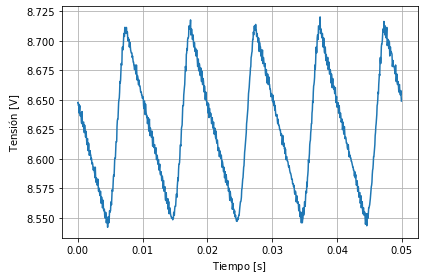

In [167]:
fig, ax = plt.subplots()
MeasuredAxes.embed(ax, axes_unit(u.s, u.V, nu))

ax.grid()
ax.u.set_xlabel("Tiempo")
ax.u.set_ylabel("Tensión")
ax.u.plot(t, v)
fig.tight_layout()
fig.savefig(out / f"{ensayo}_{sub}_captura.svg", bbox_inches="tight")

In [168]:
def my_fft(d, y):
    n = len(y)
    f = np.fft.rfftfreq(n, d=d)
    halved = 1/((f == 0) + 1)
    return f, abs(np.fft.rfft(y)*halved)/len(f)

def fft_axes(t_units, y_units, f_units, nu):
    fig, (ax_t, ax_f) = plt.subplots(1, 2)
    MeasuredAxes.embed(ax_t, axes_unit(t_units, y_units, nu))
    MeasuredAxes.embed(ax_f, axes_unit(f_units, y_units, nu))
    fig.set_figwidth(10)
    #fig.set_figheight(2.8)
    return fig, (ax_t, ax_f)

def my_bar(bar, x, y, *args, width_factor=1, **kwargs):
    return bar(x, y, width=min(np.diff(x))*width_factor, *args, **kwargs)

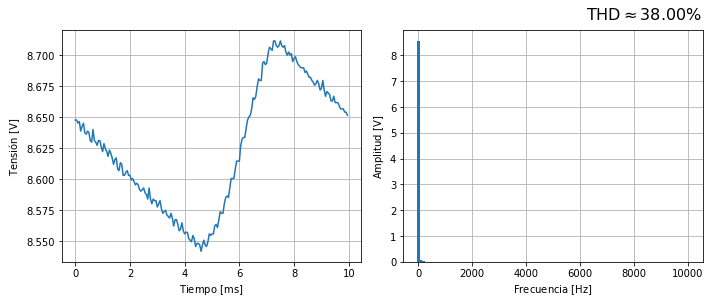

In [169]:
fig, (ax_t, ax_f) = fft_axes(u.ms, u.V, u.Hz, nu)
ax_t.u.set_xlabel("Tiempo")
ax_t.u.set_ylabel("Tensión")
ax_t.grid()
ax_f.u.set_xlabel("Frecuencia")
ax_f.u.set_ylabel("Amplitud")
ax_f.grid()
ax_f.set_axisbelow(True)

# Tomando el primer período
nT = int(sfreq//fundamental)
tT, vT = t[:nT], v[:nT]
fT, aT = my_fft(nu[Ts], vT)

ax_t.u.plot(tT, vT)
my_bar(ax_f.u.bar, fT, aT)
#amax = np.argmax(aT)
#ax_f.text(
#    wu(fT[amax]),
#    wu(aT[amax]),
#    f"${latex_notext(nu.to_symb(u.Hz, fT[amax]))}$")

#ax_w = ax_f.u.twinx(u.percent)
#ax_w.u.set_ylabel("Energía acumulada")
#ax_w.u.plot(fT, eint(aT)*100*nu[u.percent], color="C1")

afun = closest_arg(fT, nu[fundamental])
adc = closest_arg(fT, 0)
thdT = thd(aT[afun], np.delete(aT, [afun, adc]))
fig.text(.98, 1,
    f"$\\mathrm{{THD}}\\approx{thdT*100:.02f}\\%$",
    fontsize=16, ha="right")

fig.tight_layout()
fig.savefig(out / f"{ensayo}_{sub}_fft.svg", bbox_inches="tight")



In [170]:
thd

<function utils.math.thd(fundamental, harmonics)>